<a href="https://colab.research.google.com/github/tabaahi07/Machine-Learning/blob/main/13.%20GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
data = load_digits()
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
df = pd.DataFrame(data.data)
df['target'] = data.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


<Figure size 640x480 with 0 Axes>

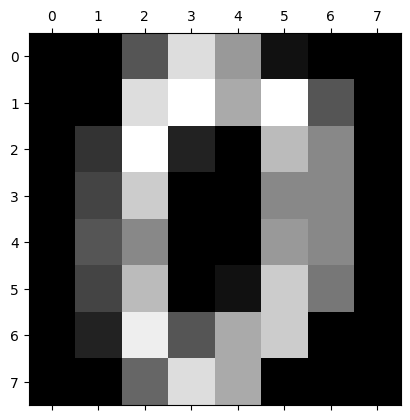

In [ ]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(data.images[0])

In [ ]:
X = df.drop('target' , axis=1)
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(X,df['target'] , train_size=0.8)

In [ ]:
from sklearn.svm import SVC
model = SVC(C=10 , kernel='rbf')
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9888888888888889

In [ ]:
# Using manually trying all parameters
from sklearn.model_selection import cross_val_score
kernels = ['rbf' , 'linear']
C = [1,10,20]
mean_scores = {}
for ker in kernels:
  for cval in C:
    model = SVC(kernel=ker , C=cval,gamma='auto')
    score = cross_val_score(model,X,df['target'],cv=5)
    mean_scores[ker + '_' + str(cval)] = np.mean(score)

mean_scores

{'rbf_1': 0.448545341999381,
 'rbf_10': 0.47636645001547506,
 'rbf_20': 0.47636645001547506,
 'linear_1': 0.9476973073351903,
 'linear_10': 0.9476973073351903,
 'linear_20': 0.9476973073351903}

In [ ]:
#Using gridSearch CV
from sklearn.model_selection import GridSearchCV
parameters = {'kernel' : ('rbf' , 'linear') , 'C' :[1,10,20]}
model = SVC()
clf = GridSearchCV(model , parameters)
clf.fit(X , df['target'])
clf.cv_results_

{'mean_fit_time': array([0.05276065, 0.03185296, 0.04880872, 0.03131618, 0.04816685,
        0.03538771]),
 'std_fit_time': array([0.00300934, 0.00106375, 0.00131086, 0.00159526, 0.00214044,
        0.00559497]),
 'mean_score_time': array([0.02511625, 0.00877533, 0.02661762, 0.00885954, 0.0230113 ,
        0.00931497]),
 'std_score_time': array([0.00059374, 0.0001882 , 0.00387909, 0.0003836 , 0.00104148,
        0.00028106]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [ ]:
scoreData = pd.DataFrame(clf.cv_results_)
scoreData

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.052761,0.003009,0.025116,0.000594,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.961111,0.944444,0.983287,0.988858,0.938719,0.963284,0.020086,3
1,0.031853,0.001064,0.008775,0.000188,1,linear,"{'C': 1, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,4
2,0.048809,0.001311,0.026618,0.003879,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.980556,0.958333,0.983287,0.988858,0.958217,0.973850,0.012995,1
3,0.031316,0.001595,0.008860,0.000384,10,linear,"{'C': 10, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,4
4,0.048167,0.002140,0.023011,0.001041,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.980556,0.958333,0.983287,0.988858,0.958217,0.973850,0.012995,1
5,0.035388,0.005595,0.009315,0.000281,20,linear,"{'C': 20, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,4


In [ ]:
scoreData[['param_C' , 'param_kernel' , 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.963284
1,1,linear,0.947697
2,10,rbf,0.973850
3,10,linear,0.947697
4,20,rbf,0.973850
5,20,linear,0.947697


In [ ]:
#Randomized Search CV -- decs No. of iterations
from sklearn.model_selection import RandomizedSearchCV
parameters = {'kernel' : ('rbf' , 'linear') , 'C' :[1,10,20]}
model = SVC()
clf = RandomizedSearchCV(model , parameters)
clf.fit(X , df['target'])
pd.DataFrame(clf.cv_results_)[['param_C','param_kernel','mean_test_score']]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,param_C,param_kernel,mean_test_score
0,1,rbf,0.963284
1,1,linear,0.947697
2,10,rbf,0.973850
3,10,linear,0.947697
4,20,rbf,0.973850
5,20,linear,0.947697
